In [115]:
__author__ = 'bibby'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [116]:
np.random.seed(123)
data1 = np.random.randn(2,100)
data2 = np.random.randn(2,100)+2

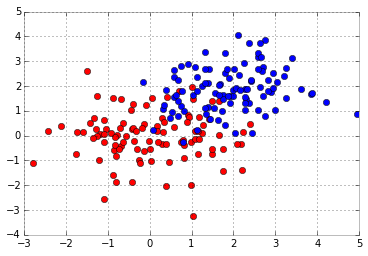

In [117]:
pl.plot(data1[0], data1[1], 'o', c='r');
pl.plot(data2[0], data2[1], 'o', c='b');


In [118]:
xdata = np.concatenate([data1[0], data2[0]])
ydata = np.concatenate([data1[1], data2[1]])
xdata.shape
data = np.array([xdata, ydata])

In [119]:
#the first random choice is terrible so we reset the seed
np.random.seed(333)
xc1 = np.random.uniform(xdata.min(), xdata.max())
xc2 = np.random.uniform(xdata.min(), xdata.max())

yc1 = np.random.uniform(ydata.min(), ydata.max())
yc2 = np.random.uniform(ydata.min(), ydata.max())

c1 = np.array([xc1, yc1])
c2 = np.array([xc2, yc2])

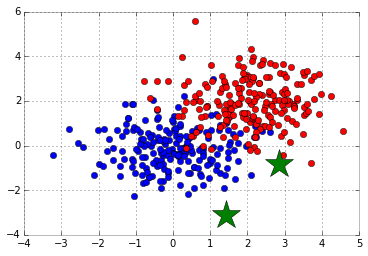

In [120]:

pl.plot(x1, y1, 'o', c='b');
pl.plot(x2, y2, 'o', c='r');
pl.plot(xc1, yc1, '*', c='g', ms=30);
pl.plot(xc2, yc2, '*', c='g', ms=30);

In [121]:
def distance(a1, c1):
    return np.sqrt((a1[0]-c1[0])**2 + (a1[1]-c1[1])**2)  

In [128]:
tol=0.01 #threshold for stopping. it is arbitrary

In [129]:
#added iteration
for i in range(100):
#    print np.abs(newx1 - c1[0]) ,np.abs(newy1 - c1[1]) ,np.abs(newx2 - c2[0]) , np.abs(newx1 - c2[1])  

    if np.abs(newx1 - c1[0]) < tol and np.abs(newy1 - c1[1]) < tol \
    and np.abs(newx2 - c2[0]) < tol and np.abs(newx2 - c2[1]) < tol :
        break
    c1 = np.array([newx1, newy1])
    c2 = np.array([newx2, newy2])
    label = distance(data, c1) < distance(data, c2)
    #prwint(label)
    newx1 = data[0][label].mean()
    newy1 = data[1][label].mean()
    #print(newx1, newy1)
    newx2 = data[0][~label].mean()
    newy2 = data[1][~label].mean()
    #print(newx2, newy2)
    pl.figure()
    pl.plot(data[0][label], data[1][label], 'o', c = 'r');
    pl.plot(data[0][~label], data[1][~label], 'o', c = 'b');
    pl.plot(newx1, newy1, '*', c = 'g', ms = 30);
    pl.plot(newx2, newy2, '*', c = 'g', ms = 30);
    
    